In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
data = pd.read_csv("../../data/Symphony-Data.csv")
data.head()

,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,13-Jun-24,1242.20,1244.0,1260.90,1226.80,154710,1.18%
1,12-Jun-24,1227.70,1210.0,1244.00,1204.00,246676,1.51%
2,11-Jun-24,1209.40,1163.4,1221.00,1157.30,472663,3.96%
3,10-Jun-24,1163.30,1145.0,1169.95,1137.05,157659,1.08%
4,07-Jun-24,1150.85,1108.0,1160.75,1103.70,359926,3.90%


In [55]:
data= data.drop(["OPEN","HIGH", "LOW", "VOLUME", "CHANGE(%)"], axis=1)


In [56]:
data["DATE"] = pd.to_datetime(data["DATE"], format="%d-%b-%y")
data = data.sort_values(by="DATE")
data.head()

,DATE,PRICE
1238,2019-06-18,1204.90
1237,2019-06-19,1243.95
1236,2019-06-20,1254.45
1235,2019-06-21,1232.55
1234,2019-06-24,1228.65


In [62]:
#simple exponential smoothing
xData=data["DATE"]
yData= data["PRICE"]
print(y)
print(x)
alpha = 0.6    
initialPred = data["PRICE"][0]
ypred = [initialPred]

for idx,y in enumerate(data["PRICE"]):
    ypred.append(alpha*y + (1-alpha)*ypred[idx])

1242.2
1238   2019-06-18
1237   2019-06-19
1236   2019-06-20
1235   2019-06-21
1234   2019-06-24
          ...    
4      2024-06-07
3      2024-06-10
2      2024-06-11
1      2024-06-12
0      2024-06-13
Name: DATE, Length: 1239, dtype: datetime64[ns]


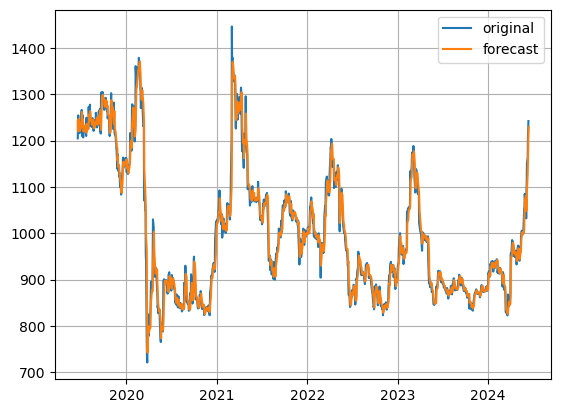

In [63]:
oneDayAheadForecastIncluded=pd.concat([data["DATE"], pd.Series([data["DATE"].iloc[-1]+pd.Timedelta(days=1)])], ignore_index=True)
plt.plot(xData, yData, label="original")
plt.plot(oneDayAheadForecastIncluded, ypred, label="forecast")
plt.legend()
plt.grid()


In [74]:
#using the package statsmodel because its fucking late at night and i dont want to develop the logic for double and triple exponential smoothing.
model = ExponentialSmoothing(data["PRICE"], trend=None, seasonal="add", seasonal_periods = 365)
fit = model.fit()
fcast = fit.forecast(365)
fcast

/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/aadityapal/.conda/envs/notebook/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


1239    1235.153078
1240    1235.720049
1241    1224.845460
1242    1236.987173
1243    1249.079466
           ...     
1599    1224.334690
1600    1226.183857
1601    1231.641597
1602    1231.039828
1603    1241.986050
Length: 365, dtype: float64

Text(0.5, 1.0, "Holt's winter Exponential Smoothing")

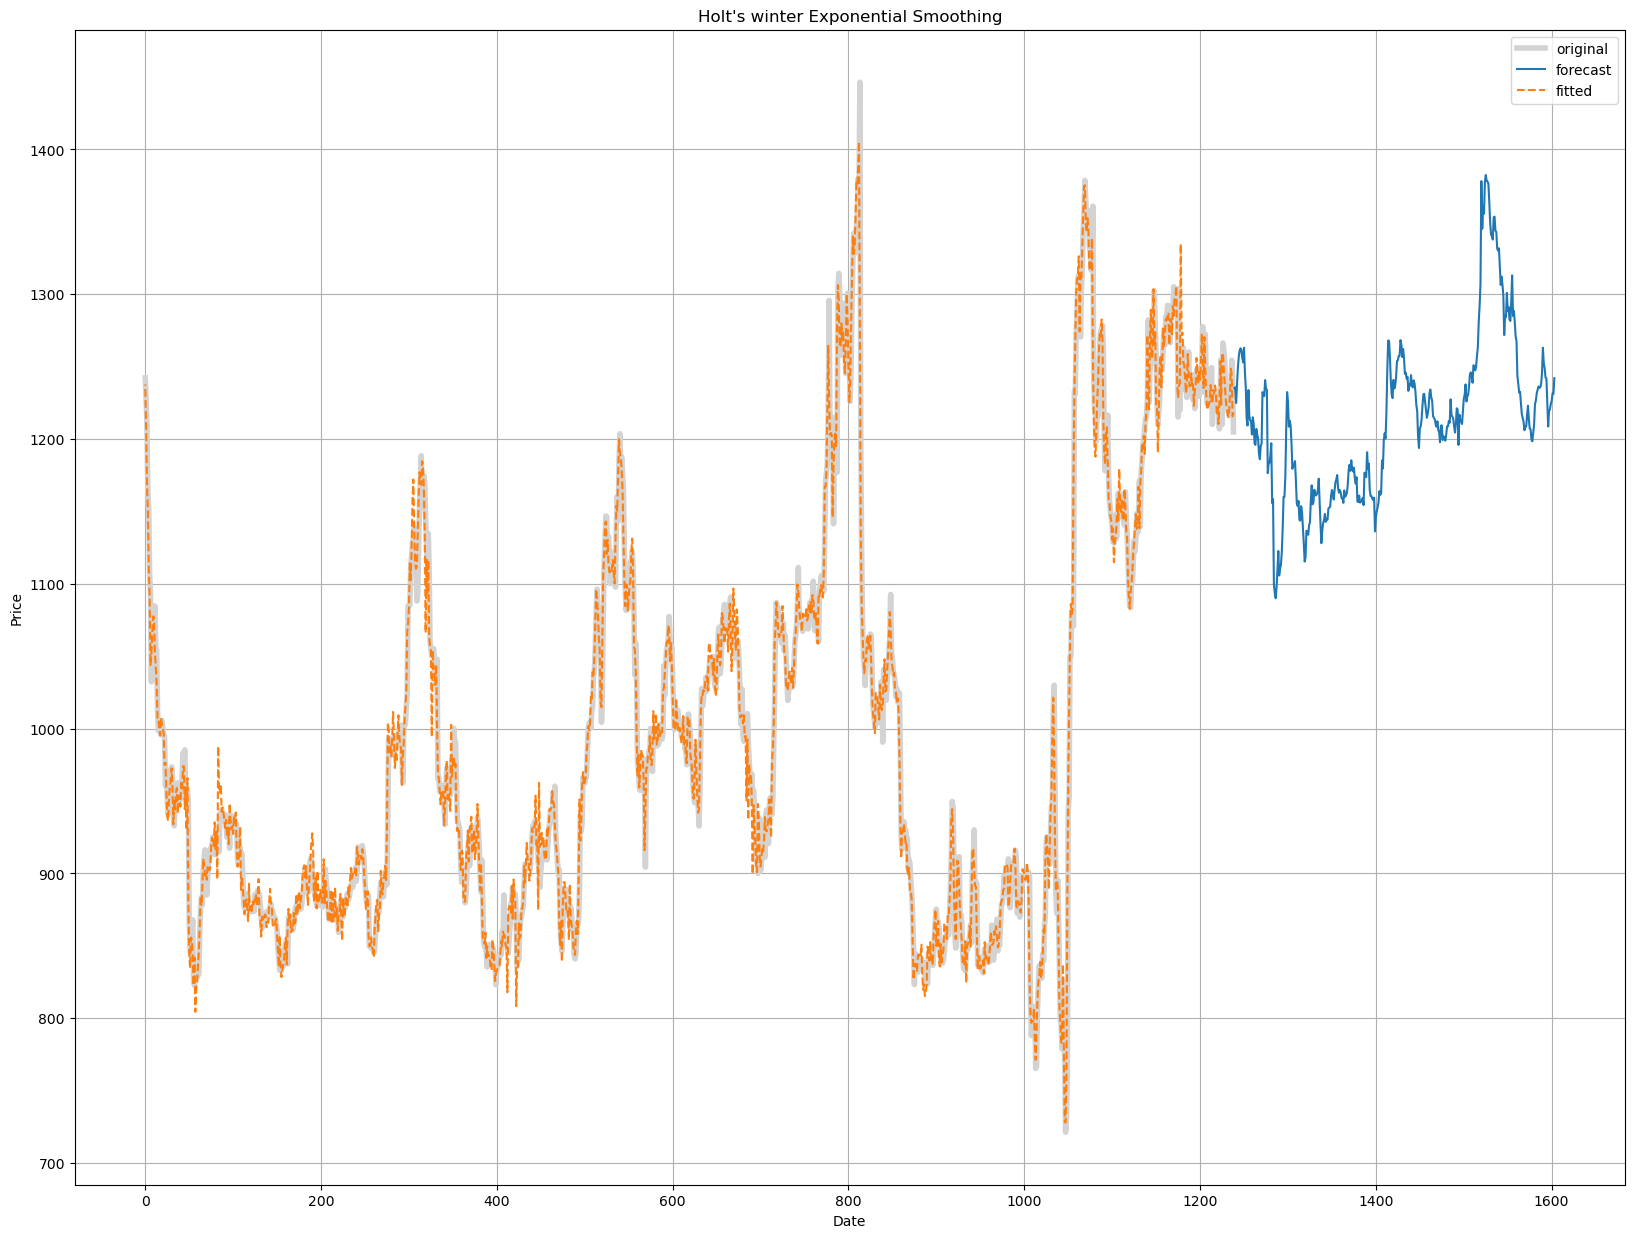

In [84]:
plt.figure(figsize=(20,15))
plt.plot(yData, linewidth= 4,label= "original",color="lightgray")
plt.plot(fcast,label="forecast")
plt.plot(fit.fittedvalues, "--",label="fitted")
plt.grid()
plt.legend()
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Holt's winter Exponential Smoothing")